# Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls  /content/drive/MyDrive/Outros/paired.csv

/content/drive/MyDrive/Outros/paired.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats

>Paired

In [ ]:
paired = pd.read_csv('/content/drive/MyDrive/Outros/paired.csv')
paired.head()

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5


>BP

In [ ]:
bp = pd.read_csv('/content/drive/MyDrive/Outros/bp.csv')
bp.head()

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No


# Análise

> BP


Criado um histograma para identificar os valores da pressão sanguinea

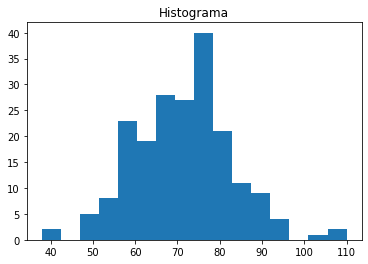

In [ ]:
plt.hist(bp['bp'], bins='auto')
plt.title("Histograma")
plt.show()

Gerando duas amostras e calculando suas médias

In [39]:
pop = bp['bp']
diabet = bp[bp['type'] == "Yes"]['bp']
ndiabet = bp[bp['type'] == "No"]['bp']

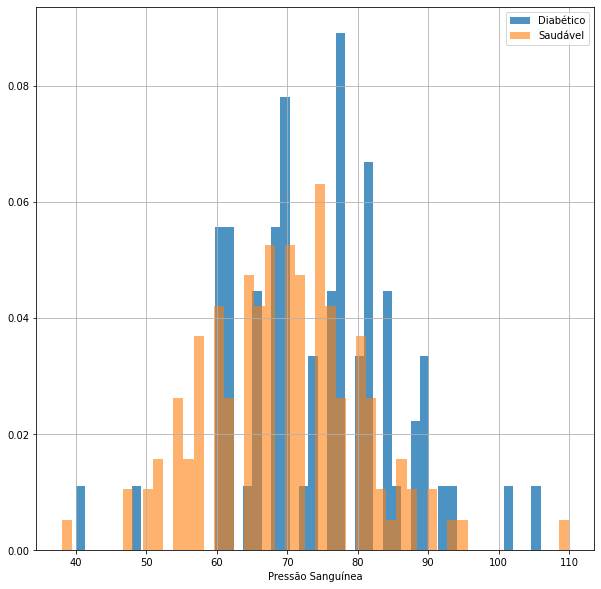

In [40]:
plt.figure(figsize=(10,10))
plt.xlabel('Pressão Sanguínea')
diabet.hist(alpha=0.8,bins=50,label='Diabético', density=True)
ndiabet.hist(alpha=0.6,bins=50,label='Saudável', density=True)
plt.legend();

In [29]:
#Amosta de valores que possuem diabete
p1 = diabet
np.mean(diabet)

74.58823529411765

In [28]:
np.median(diabet)

76.0

In [26]:
#Amosta de valores que não possuem diabete
p2 = ndiabet
np.mean(ndiabet)


69.54545454545455

In [27]:
np.median(ndiabet)

70.0

In [ ]:
len(diabet), len(ndiabet)

(68, 132)

> Teste T

In [ ]:
stats.ttest_ind(p1,p2)

Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

> Wilcoxon rank sum - Não Pareados

In [ ]:
stat, p = stats.ranksums(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.046, p=0.002
Probably different distributions


>Wilcoxon rank sum - Pareados

In [ ]:
stat, p = stats.wilcoxon(p1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


In [ ]:
p2 = np.random.choice(ndiabet, 68)  #p2 tem agora mesmo tamanho de p1
len(p1), len(p2)

(68, 68)

In [ ]:
stat, p = stats.wilcoxon(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=582.000, p=0.002
Probably different distributions


> Indíce de confiança

In [ ]:
pp1 = (p1,) 
bootstrap_ci_1 = stats.bootstrap(pp1, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci_1.confidence_interval)

ConfidenceInterval(low=71.77941176470588, high=77.29411764705883)


In [ ]:
pp2 = (p2,) 
bootstrap_ci_2 = stats.bootstrap(pp2, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci_2.confidence_interval)

ConfidenceInterval(low=65.98529411764706, high=70.76470588235294)


In [ ]:
p4 = (pop,) 
bootstrap_ci_4 = stats.bootstrap(p4, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci_4.confidence_interval)

ConfidenceInterval(low=69.665, high=72.835)


> Distribuição Normal

In [ ]:
p4 = np.random.choice(pop, 50)  #p1 tem menos que 30 elementos
stats.norm.interval(0.95, loc=np.mean(p4), scale=stats.sem(p4))

(66.58336577342905, 73.53663422657095)

In [ ]:
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

# calculate cohen's d
d = cohend(p1, p2)
print('Cohens d: %.3f' % d)

Cohens d: 0.556


> Paired

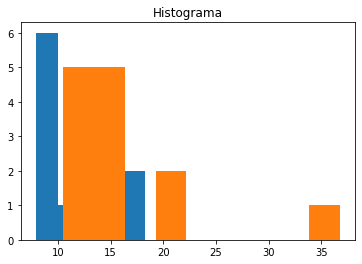

In [30]:
plt.hist(paired['August'], bins='auto')
plt.hist(paired['November'], bins='auto')
plt.title("Histograma")
plt.show()

In [31]:
p1 = paired['August']
p2 = paired['November']

In [32]:
np.mean(p1)

11.423076923076925

In [33]:
np.median(p1)

10.0

In [34]:
np.mean(p2)

16.323076923076922

In [35]:
np.median(p2)

15.3

In [ ]:
len(p1), len(p2)

(13, 13)

> Teste T

In [ ]:
stats.ttest_ind(p1,p2)

Ttest_indResult(statistic=-2.293400543711695, pvalue=0.03088448455801124)

Wilcoxon rank sum - Não Pareados

In [ ]:
stat, p = stats.ranksums(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-2.385, p=0.017
Probably different distributions


>Wilcoxon rank sum - Pareados


In [ ]:
stat, p = stats.wilcoxon(p1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


In [ ]:
stat, p = stats.wilcoxon(p1,p2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=16.000, p=0.040
Probably different distributions
